In [8]:
import pandas as pd


# Load data
robot_df = pd.read_csv(r"data/robot.csv", sep=';')
showing_df = pd.read_csv(r"data/showing.csv", sep=';')

data_frames = [robot_df, showing_df]

In [9]:
sessions = robot_df["session_id"].unique()

In [10]:
sessions

array([1], dtype=int64)

In [11]:
showing_df

,ID,action,vertix_state,session_id,node_from
0,12,0,1,1,1


In [13]:
data_frames[0].head()

,ID,vertix_state,action,session_id,node_from
0,1,0,0,1,-1
1,1,0,1,1,-1


In [19]:
import torch
import numpy as np
edges = np.array([])
for dataframe in data_frames:
   edges = np.append(edges, dataframe.loc[(dataframe["session_id"]==sessions[0]) & (dataframe['node_from'] > 0), ["node_from","ID"]])

In [20]:
edges

array([ 1., 12.])

In [21]:
!pip install -q node2vec==0.4.6
!pip install -qI gensim==4.3.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch-geometric 1.7.2 requires python-louvain, which is not installed.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [23]:
!pip install daal==2021.4.0

  Attempting uninstall: tbb
    Found existing installation: TBB 0.2


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


{('Robot', 'Showing'): Text(0.0, 5.551115123125783e-17, 'is_not')}

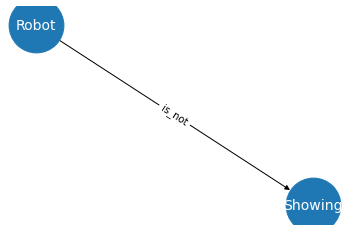

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from([('Robot', 'Showing', {"label": "is_not"})])
labels = nx.get_edge_attributes(G, "label")

plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=3000,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G, seed=0), edge_labels=labels)